# Prima esercitazione

### Esercizio 01.1

In questo esercizio viene testato il generatore di numeri casuali tra 0 e 1 descrivendo l'andamento del valor medio che essi assumono (con relativa incertezza) in funzione del numero di lanci. Utilizziamo il metodo a blocchi per ridurre l'errore gradualmente e verificare se il nostro algoritmo Monte Carlo converge al valore vero, ovvero $1/2$.
La stima dell'errore viene effettuata prendendo la deviazione standard della media:

$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

dove N è il numero di blocchi. 

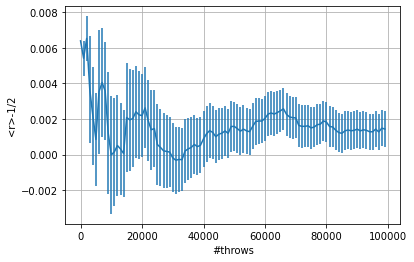

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=100000    #total number of throws           
N=100       #number of blocks         
L=int(M/N)  #throws in each block       
x = np.arange(N)  #array of integers from 0 to 99

sum_prog, err_prog = np.loadtxt("1.1.txt", usecols=(0,1), delimiter=' ', unpack='true')

x*=L 
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

### Esercizio 01.2


Effettuiamo un ulteriore test del nostro generatore di numeri casuali per stimare il valore della varianza utilizzando lo stesso algoritmo dell'esercizio 01.1 e graficando il suo andamento in funzione del numero di lanci, sapendo che il suo valore vero è $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

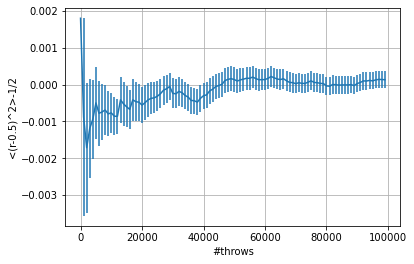

In [5]:
summ, err = np.loadtxt("1.2.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.errorbar(x,summ-1/12,yerr=err)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/2')
plt.grid(True)
plt.show()

### Esercizio 01.3

In questo esercizio effettuiamo un test di chi quadro: $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$  

dove $M=10^2$ è il numero di sub-intervalli in cui dividiamo $[0,1]$, $n=10^4$ è il numero di lanci per ciascun sub-intervallo e $n_i$ è il valore estratto. 

Siccome $(n_i - n/M)^2 \simeq n/M$ perchè il valore di $n_i$ risulta molto più piccolo di $n/M$ (che di fatto è il numero di eventi attesi in ciascun sub-intervallo), $\chi^2 \simeq 100$. Per cui se rappresentiamo l'andamento di $\chi^2$ in funzione di $j=1,...,M$ ci aspettiamo che fluttui intorno al valore 100.

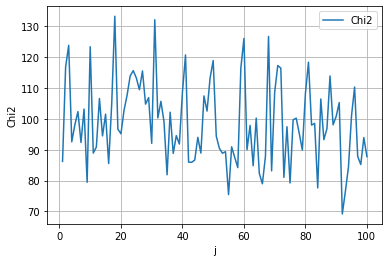

In [3]:
j, chi = np.loadtxt("1.3.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.plot(j, chi, '-', label='Chi2')
plt.xlabel('j')
plt.ylabel('Chi2')
plt.grid(True)
plt.legend()

plt.show()


# Esercizio 02

Verifichiamo la validità del teorema del limite centrale effettuando $10^4$ realizzazioni della quantità $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (con $N=1, 2, 10, 100$) utilizzando tre diverse distribuzioni di probabilità e riempiendo un istogramma con $100$ bins per ciascun $N$.

1) Nel primo caso utilizziamo una distribizione uniforme tra $0$ e $1$ e notiamo subito che al crescere di $N$ la quantità $S_N$ tende ad essere distribuita sempre di più come una gaussiana poichè le variabili utilizzate soddisfano le ipotesi del teorema del limite centrale.

N.B: le distribuzioni di probabilità rappresentate in tutti gli istogrammi sono normalizzate

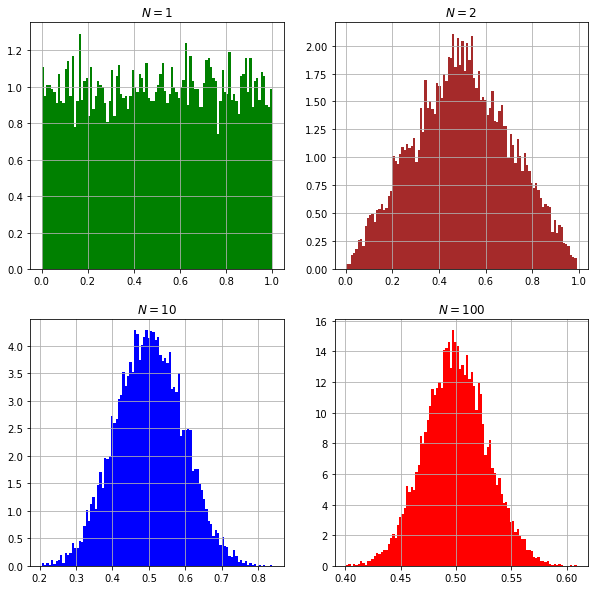

In [2]:
one, two, ten, hund = np.loadtxt("unif.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')
n_bins = 100
fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

histo1.hist(one, n_bins, density=True, color='green')
histo2.hist(two, n_bins, density=True, color='brown')
histo10.hist(ten, n_bins, density=True, color='blue')
histo100.hist(hund, n_bins, density=True, color='red')

histo1.grid(); histo1.set_title('$N=1$')
histo2.grid(); histo2.set_title('$N=2$')
histo10.grid(); histo10.set_title('$N=10$')
histo100.grid(); histo100.set_title('$N=100$')

plt.show()

2) In questo caso utilizziamo variabili distribuite esponenzialmente con $\lambda=1$ sfruttando il metodo dell'inversione della cumulativa e verifichiamo che anche esse tendono a distribuirsi gaussianamente al crescere di $N$.

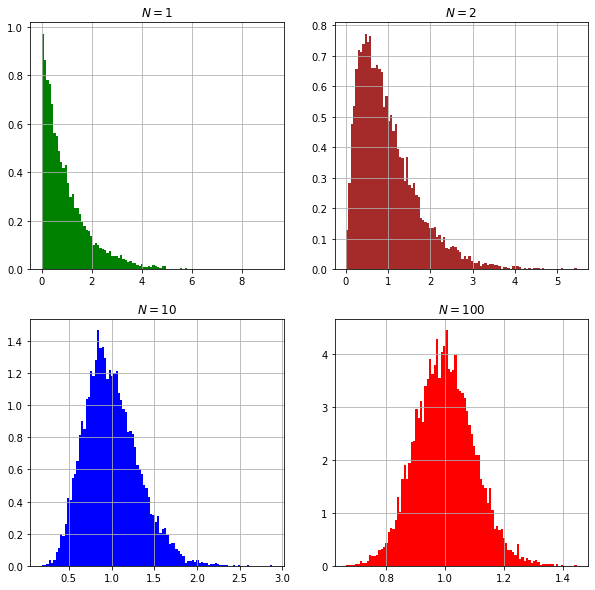

In [3]:
one, two, ten, hund = np.loadtxt("exp.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')
n_bins = 100
fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

histo1.hist(one, n_bins, density=True, color='green')
histo2.hist(two, n_bins, density=True, color='brown')
histo10.hist(ten, n_bins, density=True, color='blue')
histo100.hist(hund, n_bins, density=True, color='red')

histo1.grid(); histo1.set_title('$N=1$')
histo2.grid(); histo2.set_title('$N=2$')
histo10.grid(); histo10.set_title('$N=10$')
histo100.grid(); histo100.set_title('$N=100$')

plt.show()

3) Infine ripetiamo lo stesso procedimento, ma con variabili distribuite secondo una distribuzione di Cauchy con $\Gamma=1$ e $\mu=0$, e verifichiamo che la quantità $S_N$ non tende a distribuirsi come una gaussiana perchè variabili distribuite secondo una Lorentziana hanno varianza infinita e non soddisfano le ipotesi del teorema del limite centrale.

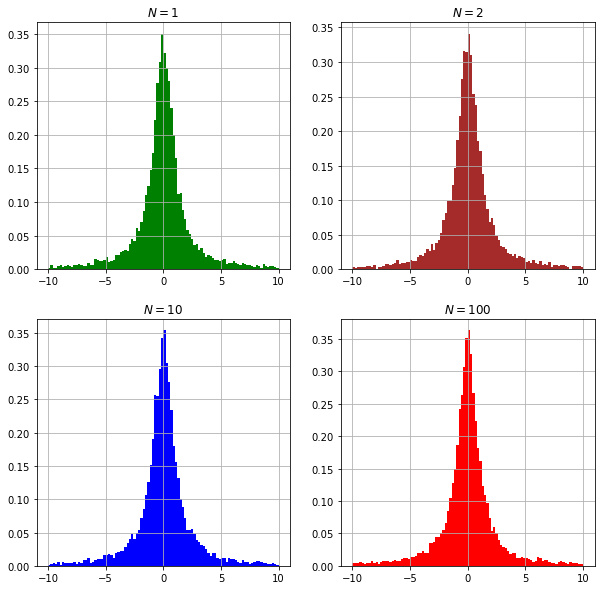

In [4]:
one, two, ten, hund = np.loadtxt("cauchy.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')
n_bins = 100
fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

histo1.hist(one, n_bins, density=True, color='green', range=(-10, 10))
histo2.hist(two, n_bins, density=True, color='brown', range=(-10, 10))
histo10.hist(ten, n_bins, density=True, color='blue', range=(-10, 10))
histo100.hist(hund, n_bins, density=True, color='red', range=(-10, 10))

histo1.grid(); histo1.set_title('$N=1$')
histo2.grid(); histo2.set_title('$N=2$')
histo10.grid(); histo10.set_title('$N=10$')
histo100.grid(); histo100.set_title('$N=100$')

plt.show()

### Esercizio 03

Infine simuliamo l'esperimento di Buffon per la misura di pi greco con un sistema composto da due sole linee orizzontali sul piano separate da una distanza unitaria e una sbarretta di lunghezza $l=0.5$ rappresentata nel piano da una coordinata cartesiana $y$ per il centro di massa e da una coordinata angolare $\theta$ per l'orientazione spaziale. 

Nella simulazione ho effettuato la statistica su $100$ blocchi ciascuno contenente $100$ misure di pi greco, e ogni misura di pi greco corrisponde a $10000$ lanci della sbarretta.

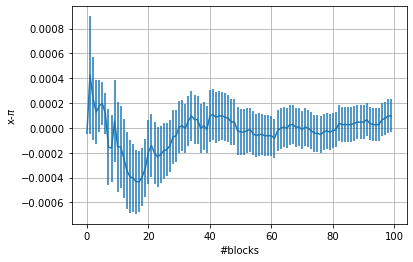

In [5]:
pi, err_prog = np.loadtxt("pi.txt", usecols=(0,1), delimiter=' ', unpack='true')

N=100                        
x = np.arange(N) 

plt.errorbar(x,pi-math.pi,yerr=err_prog)
plt.xlabel('#blocks')
plt.ylabel('x-$\pi$')
plt.grid(True)
plt.show()